# Virus Chino

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [46]:
mainpath = "C:/Users/Guany/Documents/"
filename = "Covid19casos.csv"
fullpath = os.path.join(mainpath, filename)

In [50]:
VC = pd.read_csv(fullpath)
VC.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-04-01
1,1000002,M,22.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2021-04-01
2,1000003,F,41.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2021-04-01
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2021-04-01
4,1000006,M,29.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6,NaN,515,2021-04-01


In [51]:
VC.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,8.117677e+06,8.113414e+06,8.117677e+06,8.117677e+06,8.117677e+06,8.117677e+06
mean,5.264223e+06,3.933820e+01,2.594145e+01,2.321268e+01,2.450120e+01,1.893630e+02
std,2.517177e+06,1.831959e+01,1.813205e+01,2.928040e+01,2.953537e+01,2.476782e+02
min,6.720640e+05,-1.800000e+01,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,3.100791e+06,2.600000e+01,8.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
50%,5.275454e+06,3.700000e+01,3.000000e+01,6.000000e+00,6.000000e+00,6.300000e+01
75%,7.442744e+06,5.100000e+01,4.300000e+01,3.400000e+01,3.800000e+01,3.710000e+02
max,9.598616e+06,1.210000e+02,5.300000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [49]:
pd.isnull(VC["edad_años_meses"]).values.ravel().sum()

0

In [6]:
VC["fecha_diagnostico"] = pd.to_datetime(VC["fecha_diagnostico"])

In [7]:
pd.isnull(VC["edad"]).values.ravel().sum()

4263

In [8]:
VC["edad"].mean()

39.33820485433136

In [9]:
VC["edad"].describe()

count    8.113414e+06
mean     3.933820e+01
std      1.831959e+01
min     -1.800000e+01
25%      2.600000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.210000e+02
Name: edad, dtype: float64

In [10]:
VC.loc[737]

id_evento_caso                                  1000994
sexo                                                 NR
edad                                                 10
edad_años_meses                                   Meses
residencia_pais_nombre                        Argentina
residencia_provincia_nombre                        CABA
residencia_departamento_nombre          SIN ESPECIFICAR
carga_provincia_nombre                             CABA
fecha_inicio_sintomas                        2020-06-01
fecha_apertura                               2020-06-01
sepi_apertura                                        23
fecha_internacion                                   NaN
cuidado_intensivo                                    NO
fecha_cui_intensivo                                 NaN
fallecido                                            NO
fecha_fallecimiento                                 NaN
asistencia_respiratoria_mecanica                     NO
carga_provincia_id                              

In [11]:
VC.loc[VC['edad_años_meses'] == "Meses", ["edad"]] = 0
VC.loc[VC['edad_años_meses'] == "Meses",  ['edad_años_meses']]= "Años"
VC = VC.drop(VC[VC['edad_años_meses'] == 39].index)
VC = VC.drop(VC[VC['sexo'] == 39].index)

In [12]:
VC['sexo'].value_counts()

F     4169225
M     3856169
NR      92283
Name: sexo, dtype: int64

In [13]:
pd.isnull(VC["edad"]).values.ravel().sum()

4263

In [14]:
VC["edad"] = VC["edad"].fillna(int(VC["edad"].mean()))

In [15]:
#VC[VC['edad'] >= 105] = int(VC["edad"].mean())
#VC[VC['edad'] < 0] = int(VC["edad"].mean())
VC.loc[VC['edad']  > 105, ["edad"]] = int(VC["edad"].mean())
VC.loc[VC['edad'] < 0 ,  ['edad']]= int(VC["edad"].mean())

In [16]:
VC["edad"].mean()

39.31066141212566

In [17]:
VC["edad_años_meses"].value_counts()

Años    8117677
Name: edad_años_meses, dtype: int64

In [18]:
VC[VC["edad_años_meses"] == 39]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion


In [19]:
VC['edad'].value_counts()

29.0     204150
30.0     202402
32.0     194381
31.0     193005
34.0     192677
28.0     192609
33.0     189410
26.0     185945
27.0     184965
35.0     182859
39.0     180842
25.0     178167
36.0     174208
38.0     174169
41.0     173319
37.0     171522
24.0     168997
40.0     168332
42.0     165046
43.0     160015
23.0     156794
44.0     149772
22.0     146086
45.0     144080
46.0     138063
21.0     134057
47.0     128230
48.0     128045
49.0     126159
20.0     121494
          ...  
77.0      27450
78.0      25310
0.0       24447
79.0      23516
80.0      22685
81.0      21416
82.0      19283
83.0      18141
84.0      17200
85.0      16397
86.0      14937
87.0      13970
88.0      13166
89.0      12270
90.0      11198
91.0       9349
92.0       7897
93.0       6820
94.0       5379
95.0       4168
96.0       3263
97.0       2325
98.0       1750
99.0       1123
100.0       745
101.0       385
102.0       207
103.0       146
104.0        61
105.0        54
Name: edad, Length: 106,

In [20]:
VC['edad'].min()

0.0

In [21]:
VC['edad'].max()

105.0

In [22]:
VC["edad"].mode()

0    29.0
dtype: float64

Text(0.5,1,'Histograma de distribucion de pacientes covid por edad')

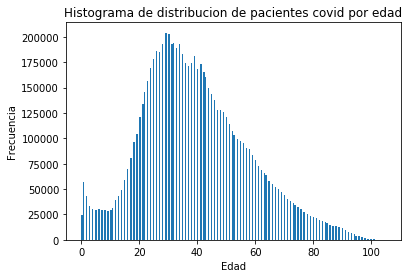

In [23]:
plt.hist(VC["edad"], bins= 200)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de distribucion de pacientes covid por edad")

In [24]:
VC["edad"].describe()

count    8.117677e+06
mean     3.931066e+01
std      1.834740e+01
min      0.000000e+00
25%      2.700000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.050000e+02
Name: edad, dtype: float64

Text(0.5,1,'Boxplot de pacientes por edad')

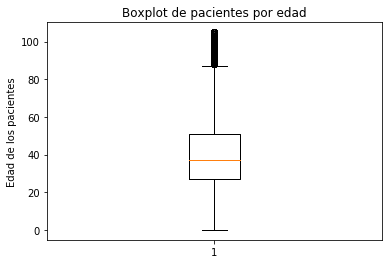

In [25]:
plt.boxplot(VC["edad"])
plt.ylabel("Edad de los pacientes")
plt.title("Boxplot de pacientes por edad")

In [26]:
VC["edad"].mode()

0    29.0
dtype: float64

In [27]:
VC['edad_años_meses'].unique()

array(['Años'], dtype=object)

Text(0.5,1,'Histograma de distribucion de pacientes covid por sexo')

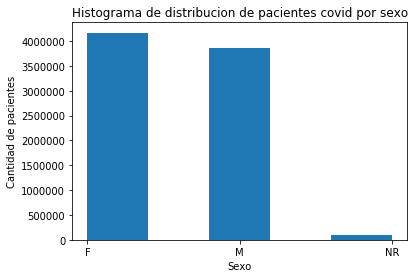

In [28]:
plt.hist(VC["sexo"], bins=5)
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pacientes")
plt.title("Histograma de distribucion de pacientes covid por sexo")

In [29]:
VC["sexo"].value_counts()

F     4169225
M     3856169
NR      92283
Name: sexo, dtype: int64

In [30]:
confirmados = VC[["clasificacion_resumen", "fecha_diagnostico"]]

In [31]:
confirmados = confirmados.replace(to_replace="Confirmado", value=1)

In [32]:
confirmados.head(15)

,clasificacion_resumen,fecha_diagnostico
0,Descartado,2020-06-09
1,Descartado,2020-06-01
2,Descartado,2020-06-01
3,Descartado,2020-06-01
4,Sospechoso,NaT
5,1,2020-06-25
6,Descartado,2020-06-01
7,Descartado,2020-06-02
8,1,2020-06-01
9,Descartado,2020-06-01


In [33]:
confirmados = confirmados.dropna()

In [34]:
confirmados = confirmados[confirmados["clasificacion_resumen"]== 1]

In [35]:
#confirmados = confirmados.drop(labels=2192241, axis=0)
#confirmados = confirmados.drop(labels=2337905, axis=0)
#confirmados = confirmados.drop(labels=2440280, axis=0)
#confirmados = confirmados.drop(labels=4794269, axis=0)
#confirmados = confirmados.drop(labels=1619136, axis=0)
#confirmados = confirmados.drop(labels=6949111, axis=0)
confirmados = confirmados.drop(labels=1824030, axis=0)

In [36]:
confirmados = confirmados[confirmados["fecha_diagnostico"] > "2020-03-02"]

In [37]:
confirmados.sort_values("fecha_diagnostico")

,clasificacion_resumen,fecha_diagnostico
5849305,1,2020-03-03
5890200,1,2020-03-06
5881156,1,2020-03-06
5868912,1,2020-03-06
5862291,1,2020-03-06
5900154,1,2020-03-06
5890726,1,2020-03-06
5884629,1,2020-03-07
5990130,1,2020-03-08
5908696,1,2020-03-08


In [38]:
confirmados["fecha_diagnostico"] = pd.to_datetime(confirmados["fecha_diagnostico"])

In [39]:
type(confirmados["fecha_diagnostico"])

pandas.core.series.Series

In [40]:
confirmados["fecha_diagnostico"]

5         2020-06-25
8         2020-06-01
10        2020-05-31
13        2020-06-01
19        2020-05-31
20        2020-06-01
21        2020-06-01
29        2020-06-01
39        2020-06-03
42        2020-06-02
52        2020-06-01
58        2020-06-20
72        2020-07-05
76        2020-09-07
82        2020-06-02
83        2020-06-01
85        2020-07-14
89        2020-06-01
93        2020-06-03
101       2020-06-25
106       2020-06-01
107       2020-06-03
109       2020-10-26
114       2020-06-01
117       2020-06-01
119       2020-06-01
129       2020-06-01
131       2020-08-12
133       2020-06-01
137       2020-06-01
             ...    
8117557   2020-06-02
8117559   2020-06-25
8117561   2020-07-21
8117566   2020-06-01
8117571   2020-08-31
8117572   2020-06-01
8117577   2020-06-01
8117582   2020-06-01
8117593   2020-06-01
8117595   2020-06-12
8117596   2020-06-01
8117603   2020-06-03
8117613   2020-07-11
8117615   2020-06-01
8117621   2020-06-02
8117623   2020-06-02
8117629   202

In [41]:
confirmgroup = confirmados.groupby("fecha_diagnostico")

In [42]:
confirmgroup.head(5)

,clasificacion_resumen,fecha_diagnostico
5,1,2020-06-25
8,1,2020-06-01
10,1,2020-05-31
13,1,2020-06-01
19,1,2020-05-31
20,1,2020-06-01
21,1,2020-06-01
29,1,2020-06-01
39,1,2020-06-03
42,1,2020-06-02


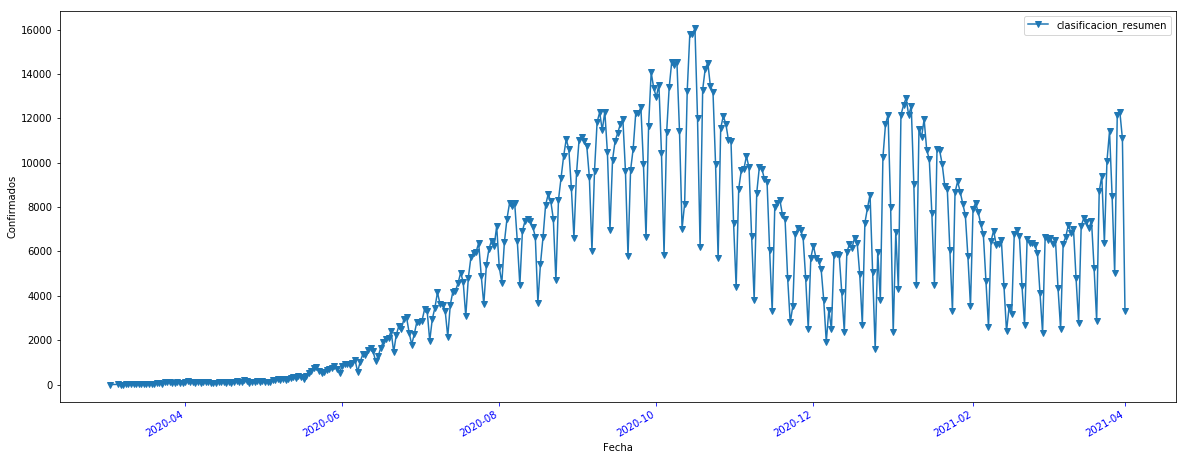

In [43]:
confirmgroup.sum().plot(kind="line", y="clasificacion_resumen", figsize=(20,8), marker= "v")
#linestyle"--""
plt.xlabel("Fecha")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [44]:
VC.corr()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
id_evento_caso,1.000000,-0.033849,-0.607082,-0.005152,0.011355,-0.119029
edad,-0.033849,1.000000,0.024055,0.002800,-0.003582,-0.016884
sepi_apertura,-0.607082,0.024055,1.000000,0.094508,0.080803,0.036451
carga_provincia_id,-0.005152,0.002800,0.094508,1.000000,0.938497,-0.318446
residencia_provincia_id,0.011355,-0.003582,0.080803,0.938497,1.000000,-0.328570
residencia_departamento_id,-0.119029,-0.016884,0.036451,-0.318446,-0.328570,1.000000
